In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# Create a dummy dataset (1000 samples, 5 features)
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)


RandomForestRegressor()

In [6]:
# Choose the feature of interest (e.g., feature at index 0)
feature_index = 0

In [7]:
feature_values = np.linspace(X[:, feature_index].min(), X[:, feature_index].max(), num=10)

In [8]:
# Duplicate the dataset
X_new = np.tile(X, (len(feature_values), 1))  

# Replace the selected feature
X_new[:, feature_index] = np.repeat(feature_values, X.shape[0])  

In [20]:
# Generate predictions for each modified dataset
predictions = model.predict(X_new)
len(predictions)

10000

(10, 1000) (1000, 5)


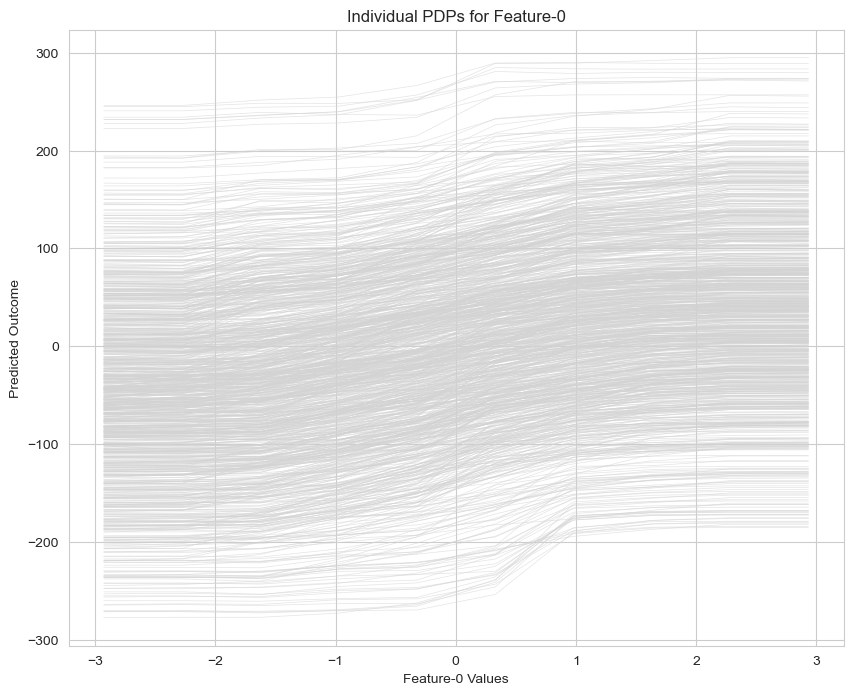

In [22]:
from matplotlib.pyplot import plot

# Reshape to (10, 1000)
predictions = predictions.reshape(len(feature_values), X.shape[0])
print(predictions.shape, X.shape)

plt.figure(figsize=(10, 8))

# Loop through each instance and plot the line
for i in range(X.shape[0]):
    plt.plot(feature_values, predictions[:, i],
             color='lightgray', lw=0.5, alpha=0.6)

# Add labels and title
plt.title(f"Individual PDPs for Feature-{feature_index}")
plt.xlabel(f"Feature-{feature_index} Values")
plt.ylabel("Predicted Outcome")

plt.grid(True)
plt.show()

In [23]:
# Reshape predictions to match the number of feature values and samples
predictions = predictions.reshape(len(feature_values), X.shape[0])

# Average the predictions for each feature value
pdp = np.mean(predictions, axis=1)


(10, 1000) (1000, 5)


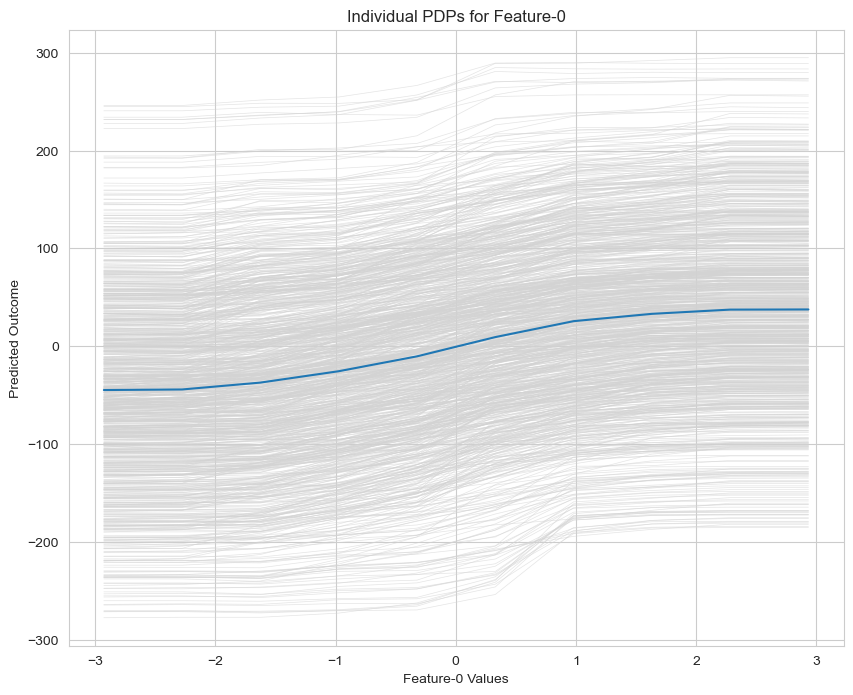

In [25]:
from matplotlib.pyplot import plot

# Reshape to (10, 1000)
predictions = predictions.reshape(len(feature_values), X.shape[0])
print(predictions.shape, X.shape)

plt.figure(figsize=(10, 8))

# Loop through each instance and plot the line
for i in range(X.shape[0]):
    plt.plot(feature_values, predictions[:, i],
             color='lightgray', lw=0.5, alpha=0.6)
plt.plot(feature_values, pdp)
# Add labels and title
plt.title(f"Individual PDPs for Feature-{feature_index}")
plt.xlabel(f"Feature-{feature_index} Values")
plt.ylabel("Predicted Outcome")

plt.grid(True)
plt.show()

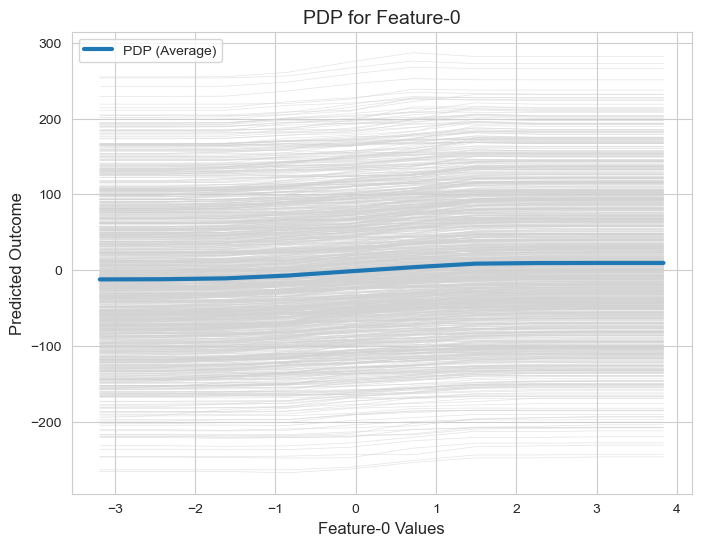

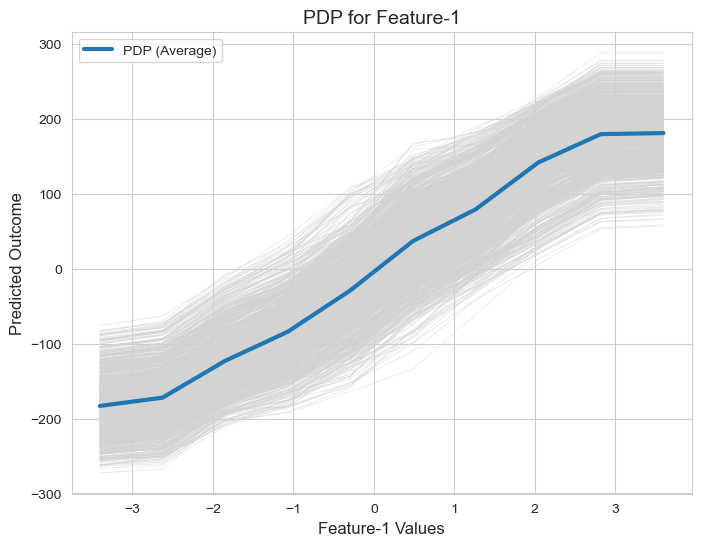

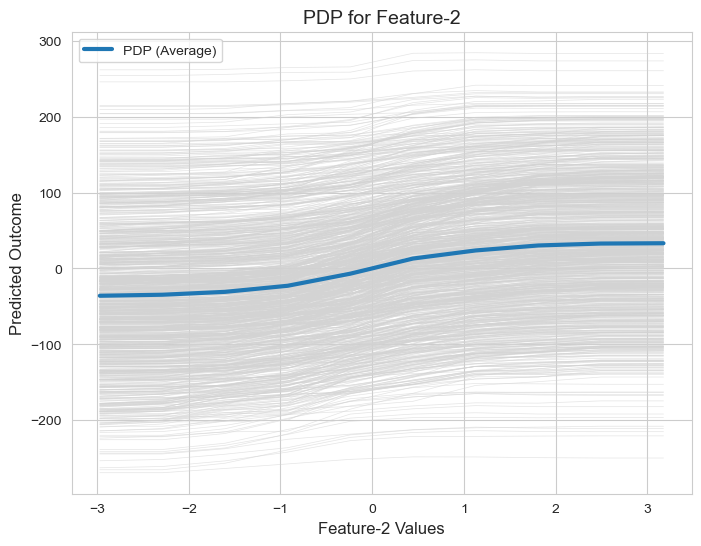

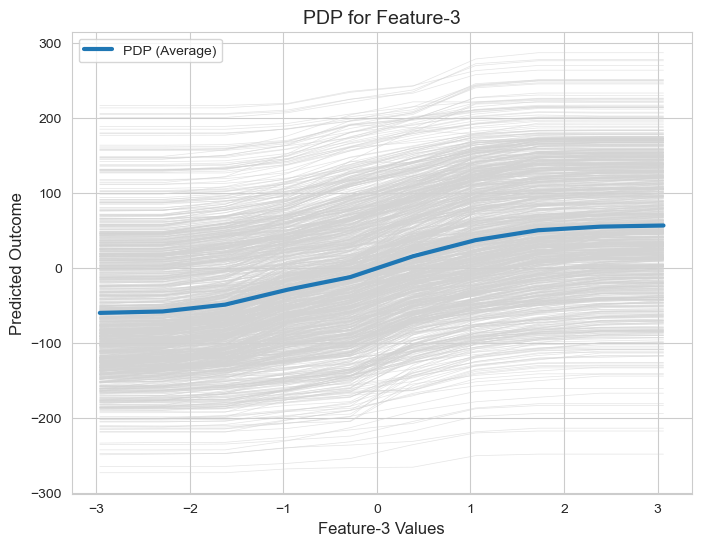

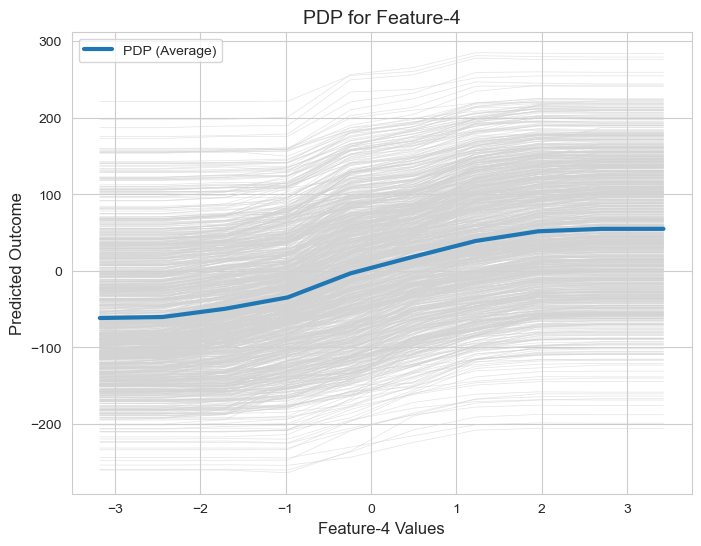

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# Step 1: Create a dummy dataset and train the model
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 2: Loop through all features and compute ICE and PDP
n_features = X.shape[1]

for feature_index in range(n_features):
    # Define the range of values for the chosen feature
    feature_values = np.linspace(X[:, feature_index].min(), X[:, feature_index].max(), num=10)

    # Modify the dataset for each feature value
    X_new = np.tile(X, (len(feature_values), 1))  # Duplicate dataset
    X_new[:, feature_index] = np.repeat(feature_values, X.shape[0])  # Replace selected feature

    # Generate predictions for all instances
    predictions = model.predict(X_new)
    predictions = predictions.reshape(len(feature_values), X.shape[0])  # Reshape to (10, 1000)

    # Compute the PDP (average of the predictions)
    pdp = np.mean(predictions, axis=1)

    # Plot ICE lines for the feature
    plt.figure(figsize=(8, 6))
    for i in range(X.shape[0]):
        plt.plot(feature_values, predictions[:, i], color='lightgray', lw=0.5, alpha=0.6)

    # Overlay the PDP (average line)
    plt.plot(feature_values, pdp, lw=3, label='PDP (Average)')

    # Customize plot
    plt.title(f"PDP for Feature-{feature_index}", fontsize=14)
    plt.xlabel(f"Feature-{feature_index} Values", fontsize=12)
    plt.ylabel("Predicted Outcome", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Create a dummy binary classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)


RandomForestClassifier()

In [29]:
# Choose the feature of interest (e.g., feature at index 0)
feature_index = 0

In [30]:
feature_values = np.linspace(X[:, feature_index].min(), X[:, feature_index].max(), num=10)

In [31]:
# Duplicate the dataset
X_new = np.tile(X, (len(feature_values), 1))  

# Replace the selected feature
X_new[:, feature_index] = np.repeat(feature_values, X.shape[0])  

In [32]:
X_new

array([[-4.18999527, -1.19643086,  0.59968468,  1.53518581, -0.19974734],
       [-4.18999527,  2.09772708, -1.16779837, -2.15176116,  0.44708274],
       [-4.18999527,  0.16094019, -0.04089847, -0.39104036, -0.21225712],
       ...,
       [ 5.94494949, -1.31351106,  0.60324417,  1.94119646,  0.8708973 ],
       [ 5.94494949,  0.80378174, -0.14685833, -2.21930997, -1.11942191],
       [ 5.94494949, -1.69575307,  0.77872258,  2.50642639, -0.29175382]])

In [33]:
# Generate probabilities for the positive class (class 1)

probabilities = model.predict_proba(X_new)[:, 1]

In [34]:
# Reshape probabilities to match the number of feature values and samples
probabilities = probabilities.reshape(len(feature_values), X.shape[0])

# Average the probabilities for each value of Feature_0
pdp = np.mean(probabilities, axis=1)


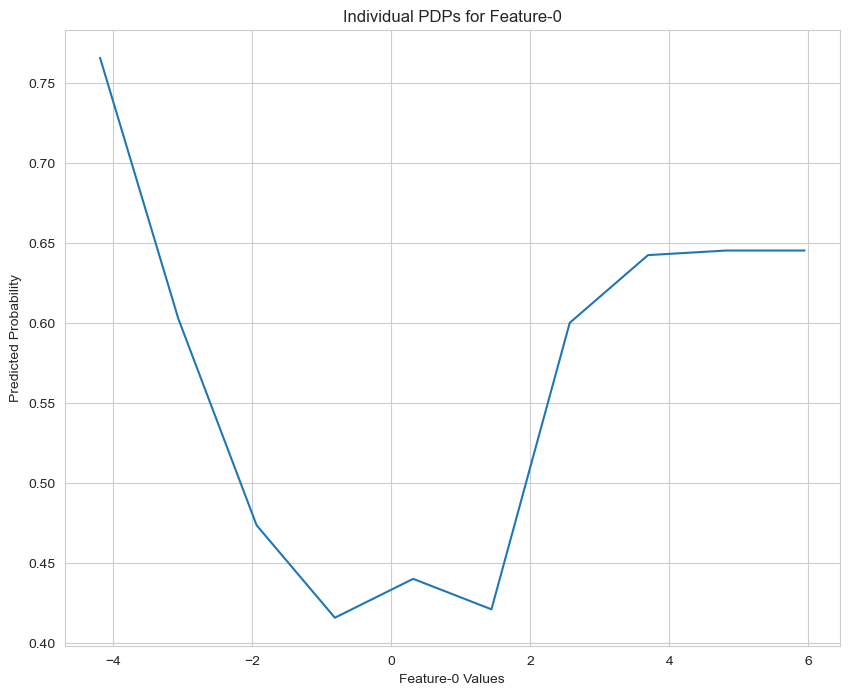

In [36]:
# Reshape to (10, 1000)

plt.figure(figsize=(10, 8))

# Loop through each instance and plot the line
plt.plot(feature_values, pdp)
# Add labels and title
plt.title(f"Individual PDPs for Feature-{feature_index}")
plt.xlabel(f"Feature-{feature_index} Values")
plt.ylabel("Predicted Probability")

plt.grid(True)
plt.show()

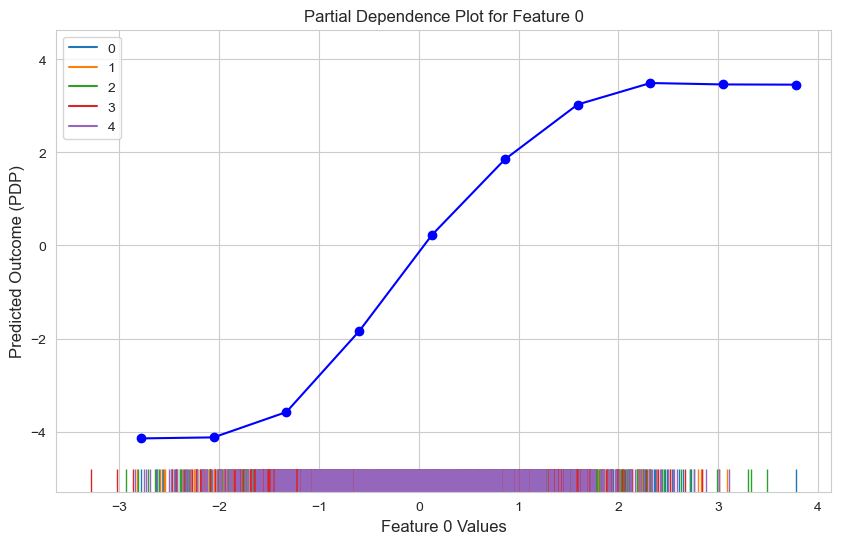

In [40]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# Step 1: Create a dummy dataset and train the model
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 2: Choose the feature of interest
feature_index = 0

# Step 3: Define the range of values for the chosen feature
feature_values = np.linspace(X[:, feature_index].min(), X[:, feature_index].max(), num=10)

# Step 4: Modify the dataset for each feature value
X_new = np.tile(X, (len(feature_values), 1))
X_new[:, feature_index] = np.repeat(feature_values, X.shape[0])

# Step 5: Generate predictions and compute the PDP
predictions = model.predict(X_new)
predictions = predictions.reshape(len(feature_values), X.shape[0])
pdp = np.mean(predictions, axis=1)

# Step 6: Plot the PDP
plt.figure(figsize=(10, 6))
plt.plot(feature_values, pdp, marker='o', linestyle='-', color='b')
plt.title(f"Partial Dependence Plot for Feature {feature_index}")
plt.xlabel(f"Feature {feature_index} Values", fontsize=12)
plt.ylabel("Predicted Outcome (PDP)", fontsize=12)

# Add rug plot to show the distribution of 'km_driven'
sns.rugplot(X, height=0.05, color='black')

plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.inspection import PartialDependenceDisplay

In [48]:
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

RandomForestRegressor()

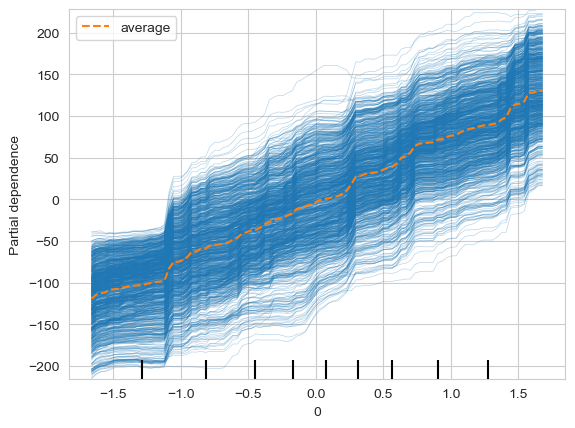

In [56]:
PartialDependenceDisplay.from_estimator(model,
                                            X, kind='both',
                                            features=[0])

# individual conditional expectation plot

Local Interpretable Model-agnostic Explanations (LIME)

In [58]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the Wine Quality dataset from OpenML
data = fetch_openml(name='wine-quality-white', version=1)
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides',  'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = pd.DataFrame(data.data.values, columns=cols)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

### LIME

In [59]:
from lime.lime_tabular import LimeTabularExplainer

# Create the LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['wine quality'],
    mode='regression'
)

In [66]:
# Pick a random instance from the test set
instance_idx = 55
instance = X_test.iloc[instance_idx].values

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict,
    num_features=5 
)

# Show the explanation in a readable format
explanation.show_in_notebook(show_all=False)

/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [67]:
# Pick the instance with max volatile acidity
instance = X[X['volatile acidity'] == X['volatile acidity'].max()].values[0]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict,
    num_features=5 
)

# Show the explanation in a readable format
explanation.show_in_notebook(show_all=False)

/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


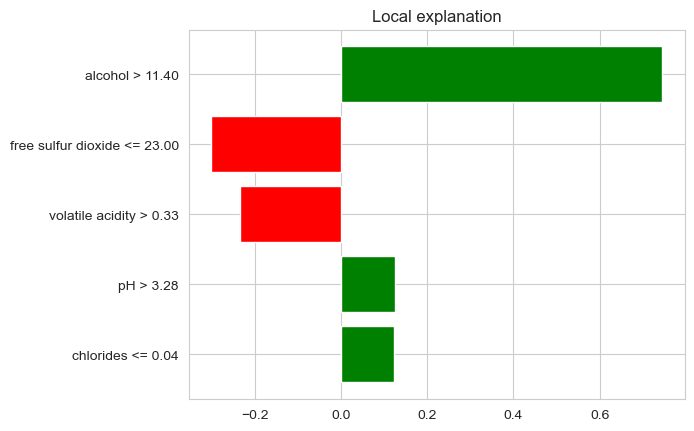

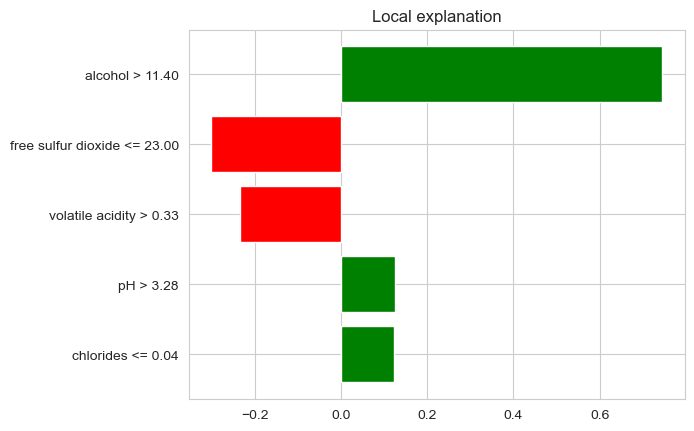

In [68]:
explanation.as_pyplot_figure()

In [71]:
instance_idx = 55
instance = X_test.iloc[instance_idx].values

model.predict(instance.reshape(1, -1))[0]


/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


4.08

In [72]:
# Sum the LIME feature contributions and intercept
sum([weight for feature, weight in explanation.as_list()]) + explanation.intercept[0]


4.216126869042732

In [73]:
def return_weights(exp):
    """Extract weights from a LIME explanation object"""
    exp_list = exp.as_map()[1] 
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    return exp_weight

In [74]:
weights = []

# Iterate over the first 100 rows of the feature matrix
for x in X_test.values[0:100]:
    exp = explainer.explain_instance(x, model.predict, num_features=11)
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

# Create a DataFrame with LIME weights for 100 instances
lime_weights = pd.DataFrame(data=weights, columns=X_test.columns)

/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names

In [75]:
lime_weights

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.019646         -0.246308    -0.074872        0.056711  -0.106118   
1        0.029468          0.277019    -0.016823       -0.166006   0.128708   
2        0.020513          0.278937     0.010654        0.059625  -0.021784   
3        0.006236         -0.276945    -0.072292        0.019507  -0.043025   
4        0.027575          0.310079     0.040258        0.075556  -0.095534   
..            ...               ...          ...             ...        ...   
95       0.052742          0.316808     0.010256       -0.130537  -0.038335   
96       0.025877         -0.099682    -0.079537       -0.155260  -0.133644   
97      -0.079485          0.068869     0.026367       -0.145414  -0.004375   
98      -0.051670         -0.274501     0.008739        0.086494  -0.110535   
99       0.037832         -0.106423     0.056006       -0.002865   0.110095   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              0.105846              0.000115 -0.029986 -0.026529  -0.060548   
1              0.150981              0.035071  0.062820 -0.027532   0.040887   
2              0.159541              0.013371  0.003009 -0.038109   0.059073   
3             -0.276736              0.038594  0.033743 -0.037285  -0.014895   
4             -0.270467             -0.064501 -0.069286 -0.062902   0.011627   
..                  ...                   ...       ...       ...        ...   
95            -0.251606              0.026174  0.027525 -0.025736  -0.048613   
96            -0.261718             -0.024981  0.062042 -0.043890  -0.050514   
97             0.148380              0.078490  0.052343 -0.034341   0.035533   
98             0.162378             -0.062568 -0.040961 -0.074238   0.015290   
99             0.036866              0.066183  0.054212 -0.061889  -0.042972   

     alcohol  
0  -0.304722  
1   0.044810  
2  -0.318185  
3  -0.296213  
4  -0.442593  
..       ...  
95 -0.302315  
96  0.010998  
97  0.031422  
98 -0.417917  
99  0.777183  

[100 rows x 11 columns]

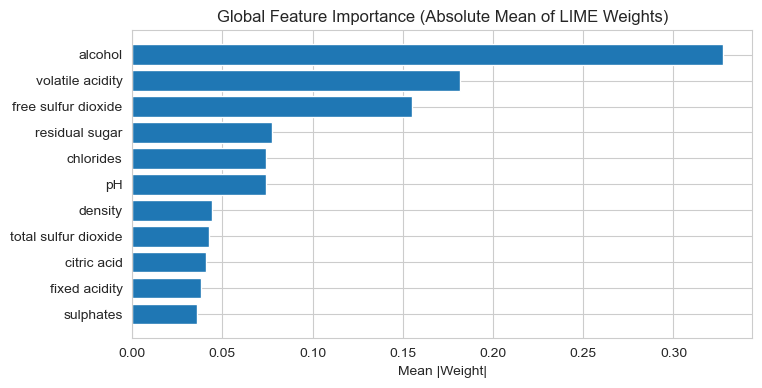

In [76]:
# Get absolute mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame({'feature': abs_mean.index,
                         'abs_mean': abs_mean}).sort_values('abs_mean')

# Plot absolute mean weights
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
plt.barh(y=abs_mean['feature'], width=abs_mean['abs_mean'])
plt.xlabel('Mean |Weight|')
plt.title('Global Feature Importance (Absolute Mean of LIME Weights)')
plt.show()

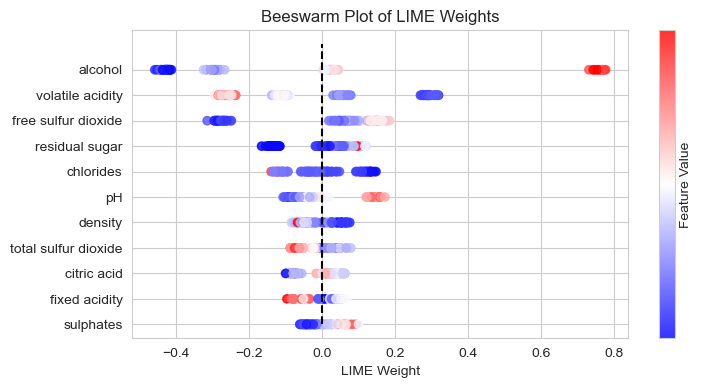

In [79]:
# Create a beeswarm plot of LIME weights
fig, ax = plt.subplots(figsize=(8, 4))

y_ticks = range(len(abs_mean))
y_labels = abs_mean['feature']

for i, feature in enumerate(y_labels):
    feature_weights = lime_weights[feature]
    feature_values = X_test[feature][0:100]
    
    plt.scatter(x=feature_weights, y=[i]*len(feature_weights), c=feature_values,
                cmap='bwr', alpha=0.8)

plt.vlines(x=0, ymin=0, ymax=len(y_labels), colors='black', linestyles='--')
plt.colorbar(label='Feature Value', ticks=[])
plt.yticks(ticks=y_ticks, labels=y_labels)
plt.xlabel('LIME Weight')
plt.title('Beeswarm Plot of LIME Weights')
plt.show()

In [81]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the Wine Quality dataset from OpenML
data = fetch_openml(name='wine-quality-white', version=1)
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides',  'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = pd.DataFrame(data.data.values, columns=cols)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
import shap
shap.initjs()

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [84]:
# Force plot for a single prediction
shap.force_plot(explainer.expected_value,
              shap_values[0,:],
              X_test.iloc[0,:])


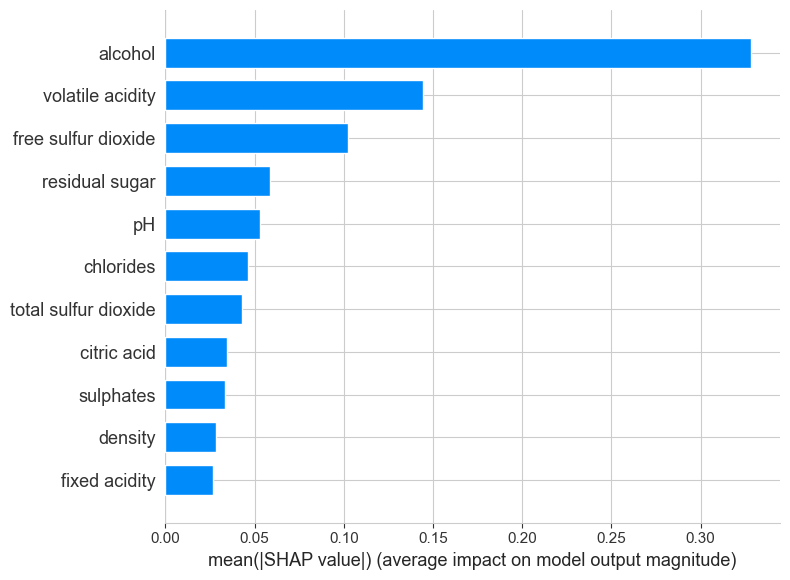

In [85]:
# Mean SHAP plot
shap.summary_plot(shap_values,
                  X_test,
                  plot_type="bar")


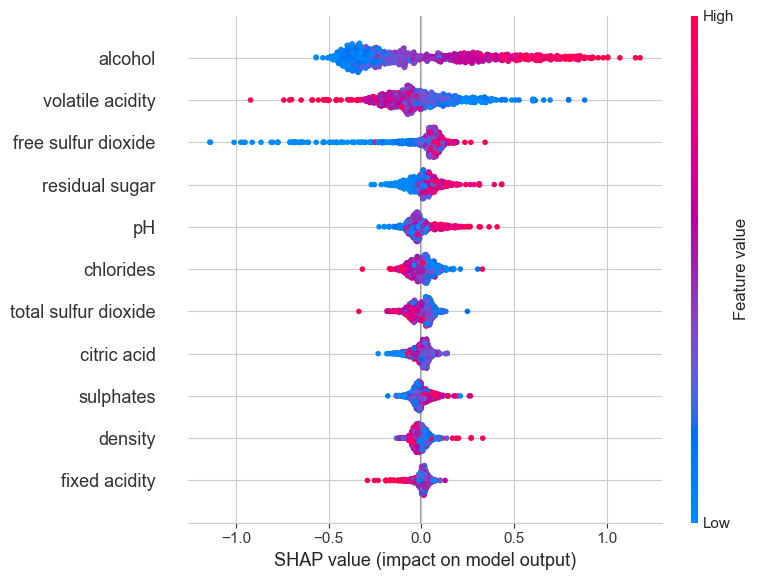

In [86]:
# Beeswarm plot
shap.summary_plot(shap_values, X_test)


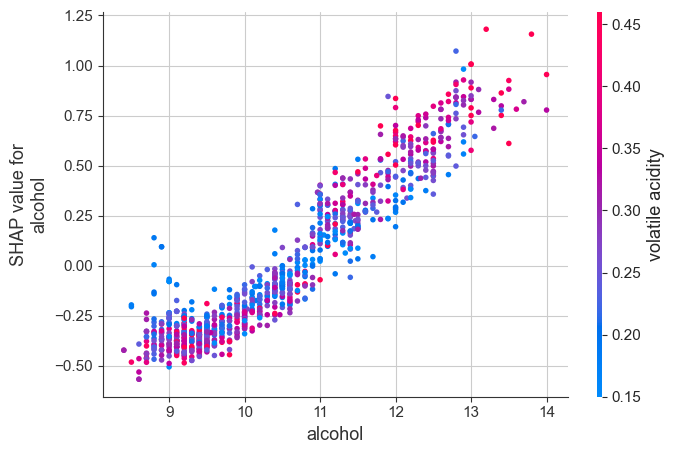

In [87]:
# Dependence plot for a specific feature (alcohol)
shap.dependence_plot("alcohol", shap_values, X_test)

In [88]:
# Mean values for the 10 dimensions
init_dimensions = 10

mean = np.zeros(init_dimensions)

# Variances for the 10 dimensions
variances = np.array([10, 8, 6, 4, 2, 1, 0.5, 0.4, 0.3, 0.2])

# Covariance matrix
cov_matrix = np.diag(variances)

# Generate the 10-dimensional dataset (1000 samples)
data = np.random.multivariate_normal(mean, cov_matrix, size=1000)

In [89]:
data.shape


(1000, 10)

In [90]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA()
pca.fit(data)

PCA()

In [91]:
# variance of individual component 
exp_var = pca.explained_variance_ratio_ 


# cumulative variance
cumulative_explained_variance = np.cumsum(exp_var)

cumulative_explained_variance


array([0.30451822, 0.55704228, 0.73886303, 0.85809407, 0.92547109,
       0.95469693, 0.97017391, 0.98412628, 0.99355799, 1.        ])

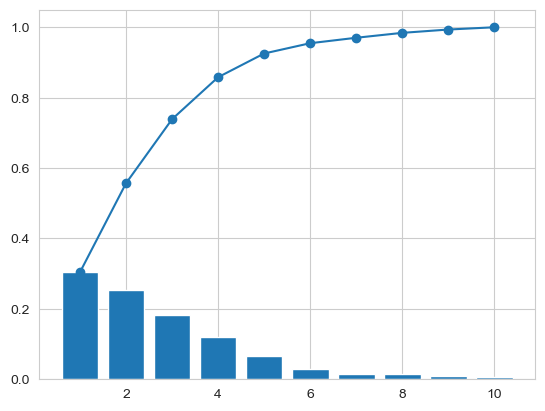

In [92]:
# add individual variance bars
plt.bar(range(1, init_dimensions+1), exp_var, align='center',
        label='Individual Component Variance')

# add cumulative variance line
plt.plot(range(1, init_dimensions+1), cumulative_explained_variance, marker="o",
         label='Cumulative Variance')

In [94]:
import numpy as np

points = 100
x = np.linspace(0, 3, points)
y = 2*x + 3 + 3*np.random.random(size = (points))

# Compute the mean and covariance matrix of the data
data = np.column_stack((x, y))
cov = np.cov(data.T)

In [97]:
from scipy.spatial.distance import mahalanobis

# Calculate the Mahalanobis distance between P1 and P2
d1 = mahalanobis((1.5, 7.1), (0.7, 10.5), np.linalg.inv(cov))


# Calculate the Mahalanobis distance between P1 and P3
d2 = mahalanobis((1.5, 7.1), (2.5, 9.5), np.linalg.inv(cov))
d1, d2


(5.7482788948577435, 1.3282485196216474)

In [100]:
import ppscore as pps

ContextualVersionConflict: (pandas 2.2.3 (/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages), Requirement.parse('pandas<2.0.0,>=1.0.0'), {'ppscore'})

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame()

df["x"] = np.linspace(0, 3*np.pi, num=100)
df["y"] = np.sin(df["x"]) + np.random.normal(0, 0.1, size=100)

In [2]:
from scipy.stats import pearsonr

pearsonr(df.x, df.y).statistic, pearsonr(df.y, df.x).statistic

(0.0037548902012521455, 0.0037548902012521698)

In [3]:
import ppscore as pps # predictive power score; asymmetric unlike correlation; works with categorical values

pps.score(df, "x", "y")['ppscore'], pps.score(df, "y", "x")['ppscore']


(0.78057440409669, 0)

In [113]:
# ! pip install pandas==1.5.3 # 2.2.3

In [17]:
#! pip install ptitprince
! pip install -U --force-reinstall seaborn==0.10.1

  Using cached numpy-2.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pillow-11.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import ptitprince as pt
# import pandas as pd
# import numpy as np
# 
# def raincloud_plot(data, x, y, hue=None, palette="Set2", figsize=(10, 6), offset=0.05):
#     """
#     Creates a raincloud plot.
# 
#     Args:
#         data (pd.DataFrame): The input data.
#         x (str): The column name for the x-axis categories.
#         y (str): The column name for the y-axis values.
#         hue (str, optional): The column name for grouping the data. Defaults to None.
#         palette (str, list, optional): The color palette to use. Defaults to "Set2".
#         figsize (tuple, optional): The figure size. Defaults to (10, 6).
#         offset (float, optional): The offset for jittering the points. Defaults to 0.05.
#     """
# 
#     fig, ax = plt.subplots(figsize=figsize)
# 
#     # Split violin plot
#     if hue:
#       sns.violinplot(
#           x=x,
#           y=y,
#           hue=hue,
#           data=data,
#           inner=None,
#           palette=palette,
#           scale="width",
#           ax=ax,
#         )
#     else:
#       sns.violinplot(
#           x=x,
#           y=y,
#           data=data,
#           inner=None,
#           palette=palette,
#           scale="width",
#           ax=ax,
#       )
# 
# 
# 
#     # Strip plot for raw data points
#     if hue:
#        pt.half_flat_violinplot(
#         data=data,
#         x=x,
#         y=y,
#         hue=hue,
#         palette=palette,
#         width=0.6,
#         offset=offset,
#         inner=None,
#         ax=ax,
#       )
#     else:
#       pt.half_flat_violinplot(
#         data=data,
#         x=x,
#         y=y,
#         palette=palette,
#         width=0.6,
#         offset=offset,
#         inner=None,
#         ax=ax,
#       )
# 
# 
#     # Box plot
#     if hue:
#       sns.boxplot(x=x, y=y, hue=hue, data=data, width=0.1,  showcaps=True,
#                 boxprops={'facecolor':'none', 'zorder':10},
#                 showfliers=False, ax=ax)
#     else:
#       sns.boxplot(x=x, y=y, data=data, width=0.1,  showcaps=True,
#                 boxprops={'facecolor':'none', 'zorder':10},
#                 showfliers=False, ax=ax)
# 
# 
# 
#     ax.set_ylabel(y)
#     if hue:
#         ax.legend(loc='upper right') # Adjust legend location as needed
# 
#     plt.tight_layout()
#     plt.show()
# 
# 
# if __name__ == "__main__":
#     # Example Usage
#     np.random.seed(42)
#     data = pd.DataFrame({
#         'Group': np.random.choice(['A', 'B', 'C'], 100),
#         'Value': np.random.normal(loc=5, scale=2, size=100) + np.random.normal(0, 0.5, 100)
#     })
#     pt.RainCloud(data)
#     data['Treatment'] = np.random.choice(['Control','Treatment'], size=100)
# 
# 
#     # Raincloud plot without hue
#     raincloud_plot(data, x='Group', y='Value', figsize=(8,6))
# 
#     # Raincloud plot with hue
#     raincloud_plot(data, x='Group', y='Value', hue='Treatment', palette=['#6c6c6c','#E69F00'], figsize=(8,6))

ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/seaborn/categorical.py)

In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import ptitprince as pt
# # import pandas as pd
# # import numpy as np

ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/home/katinska/.conda/envs/fin_experiment/lib/python3.11/site-packages/seaborn/categorical.py)

In [21]:
#! pip install -U --force-reinstall ptitprince


In [23]:
#! pip install numpy==1.26.4  pyyaml


In [2]:
import numpy as np
import pandas as pd

n = 100 # Total data points

# (x, y) data
x = np.random.standard_normal(n)
y = 2.0 * x + 1.0 * np.random.standard_normal(n)

# Convert to DataFrame
df = pd.DataFrame({"x":x, "y": y})

In [3]:
# add outliers
df.loc[df.shape[0]-2] = [8, -7]
df.loc[df.shape[0]-1] = [7.9, -7.3]

In [10]:
from sklearn.linear_model import LinearRegression, HuberRegressor

# Extract x and y data
x = df['x'].values.reshape(-1, 1)
y = df['y'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values based on the model
y_pred = model.predict(x)

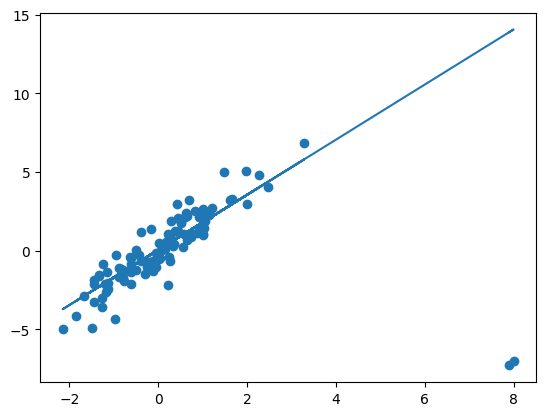

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')
ax.plot(x, y_pred, label='Linear Regression Fit')
plt.show()

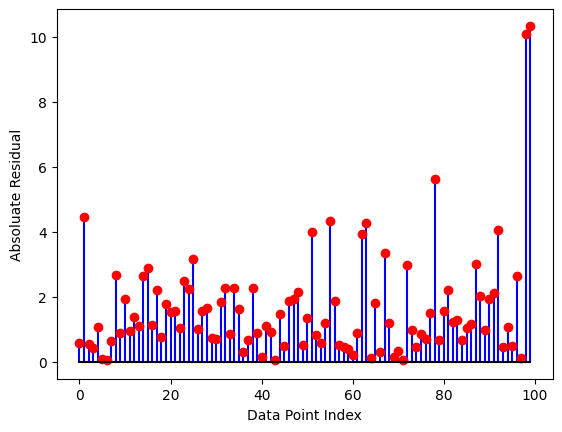

In [12]:
residuals = np.abs(model.predict(x) - y)    
plt.figure()
plt.stem(residuals, markerfmt='ro', linefmt='b-', basefmt='k-')
plt.xlabel('Data Point Index')
plt.ylabel('Absoluate Residual')
plt.show()
